In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [44]:
df.head()

Job Title                      Salary Estimate  \
0                       Data Scientist  Employer Provided Salary:$70K-$120K   
1                       Data Scientist          $88K-$122K (Glassdoor est.)   
2                       Data Scientist         $139K-$186K (Glassdoor est.)   
3  Data Scientist - Business Analytics         $112K-$155K (Glassdoor est.)   
4     Data Scientist, People Analytics         $151K-$203K (Glassdoor est.)   

                                     Job Description  Rating  \
0  BestReviews.com is the ultimate product recomm...     5.0   
1  We are passionate about solving real world pro...     4.5   
2  Software Engineer, Data Science (Optimization)...     3.3   
3  About Quora:\n\n\nThe vast majority of human k...     4.7   
4  The Position\n\n\nThe People Analytics team at...     3.9   

                 Company Name                 Location  \
0            BestReviews\n5.0        San Francisco, CA   
1  Virtual Power Systems\n4.5             Milpitas, CA   
2         Marin Software\n3.3        San Francisco, CA   
3                  Quora\n4.7        Mountain View, CA   
4              Genentech\n3.9  South San Francisco, CA   

              Headquarters                  Size  Founded  \
0        San Francisco, CA   51 to 200 employees     2014   
1             Milpitas, CA     1 to 50 employees     2013   
2        San Francisco, CA  201 to 500 employees     2006   
3        Mountain View, CA  201 to 500 employees     2009   
4  South San Francisco, CA      10000+ employees     1976   

                  Type of nership  ... tableau y/n excel y/n aws y/n  \
0               Company - Private  ...           0         0       0   
1               Company - Private  ...           0         0       0   
2                Company - Public  ...           0         0       0   
3               Company - Private  ...           1         1       0   
4  Subsidiary or Business Segment  ...           0         1       1   

  spark y/n  hadoop y/n  SQL y/n  BI y/n        job_simp  seniority desc_len  
0         0           0        1       1  data scientist         na     2137  
1         0           0        0       1  data scientist         na     2731  
2         1           0        0       1  data scientist         na     4434  
3         0           0        1       1  data scientist         na     3589  
4         0           0        1       1  data scientist         na     3285  

[5 rows x 34 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 40 columns):
Job Title                   202 non-null object
Salary Estimate             202 non-null object
Job Description             202 non-null object
Rating                      202 non-null float64
Company Name                202 non-null object
Location                    202 non-null object
Headquarters                202 non-null object
Size                        202 non-null object
Founded                     202 non-null int64
Type of nership             202 non-null object
Industry                    202 non-null object
Sector                      202 non-null object
Revenue                     202 non-null object
Competitors                 202 non-null object
hourly                      202 non-null int64
Employer Provided Salary    202 non-null int64
min salary                  202 non-null int64
max salary                  202 non-null int64
avg salary                  202 non

In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of nership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min salary', 'max salary',
       'avg salary', 'company name text', 'job city location', 'same_city',
       'age', 'python y/n', 'tableau y/n', 'excel y/n', 'aws y/n', 'spark y/n',
       'hadoop y/n', 'SQL y/n', 'BI y/n', 'job_simp', 'seniority'],
      dtype='object')

In [21]:
list = ['python', 'tableau', 'excel', 'aws', 'spark', 'hadoop', 'SQL', 'BI']
df.drop(list, axis='columns', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 32 columns):
Job Title                   202 non-null object
Salary Estimate             202 non-null object
Job Description             202 non-null object
Rating                      202 non-null float64
Company Name                202 non-null object
Location                    202 non-null object
Headquarters                202 non-null object
Size                        202 non-null object
Founded                     202 non-null int64
Type of nership             202 non-null object
Industry                    202 non-null object
Sector                      202 non-null object
Revenue                     202 non-null object
Competitors                 202 non-null object
hourly                      202 non-null int64
Employer Provided Salary    202 non-null int64
min salary                  202 non-null int64
max salary                  202 non-null int64
avg salary                  202 non

In [28]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'
    
## Job title and seniority

## Fix city?

## Job description length

## Competitor count

## hourly wage annual

## remove new line from job title

In [31]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)

In [32]:
df['job_simp'].value_counts()

analyst           100
data scientist     36
data engineer      33
na                 25
mle                 6
director            1
manager             1
Name: job_simp, dtype: int64

In [33]:
df['seniority'].value_counts()

na        171
senior     29
junior      2
Name: seniority, dtype: int64

In [36]:
df['job city location'].value_counts()

San Francisco          111
Santa Clara             13
Palo Alto               10
San Jose                 8
Sunnyvale                8
Redwood City             7
Mountain View            7
Menlo Park               6
Oakland                  5
Sacramento               4
South San Francisco      4
San Mateo                4
Roseville                3
San Ramon                2
Emeryville               2
Cupertino                1
Monterey                 1
Concord                  1
Milpitas                 1
Rocklin                  1
Pleasanton               1
Livermore                1
Fremont                  1
Name: job city location, dtype: int64

In [39]:
df.drop('Company Name Text', axis = 1, inplace=True)

In [45]:
## Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2137
1      2731
2      4434
3      3589
4      3285
       ... 
197    2545
198    1563
199    3560
200    3655
201    4816
Name: desc_len, Length: 202, dtype: int64

In [59]:
## Competitor count
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3                                                     -1
4                                                     -1
                             ...                        
197               Audi, BMW, Mercedes-Benz International
198               Google, Microsoft, Samsung Electronics
199                                                   -1
200                                                   -1
201    Los Alamos National Laboratory, NASA Jet Propu...
Name: Competitors, Length: 202, dtype: object

In [56]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split()) if x != -1 else 0)

In [58]:
df['num_comp'].value_counts()

1     121
3      30
4      28
2       8
7       5
5       5
6       2
11      1
9       1
8       1
Name: num_comp, dtype: int64

In [60]:
# Hourly wage annual
df['hourly']

0      0
1      0
2      0
3      0
4      0
      ..
197    0
198    0
199    0
200    0
201    0
Name: hourly, Length: 202, dtype: int64

In [70]:
df['min salary'] = df.apply(lambda x: x['min salary']*2 if x.hourly == 1 else x['min salary'], axis=1)

In [74]:
df.hourly.value_counts()

0    202
Name: hourly, dtype: int64

In [76]:
df['company name text']

0                          BestReviews
1                Virtual Power Systems
2                       Marin Software
3                                Quora
4                            Genentech
                    ...               
197                              Tesla
198                              Apple
199                      GM Cruise LLC
200                           DoorDash
201    Lawrence Livermore National Lab
Name: company name text, Length: 202, dtype: object

# Stats

In [77]:
df.describe()

Rating      Founded  hourly  Employer Provided Salary  min salary  \
count  202.000000   202.000000   202.0                202.000000  202.000000   
mean     3.916337  1923.351485     0.0                  0.014851   96.841584   
std      0.467853   366.744859     0.0                  0.121259   34.674530   
min      2.000000    -1.000000     0.0                  0.000000   38.000000   
25%      3.600000  1982.000000     0.0                  0.000000   68.000000   
50%      3.900000  2003.000000     0.0                  0.000000   90.000000   
75%      4.200000  2010.000000     0.0                  0.000000  120.750000   
max      5.000000  2015.000000     0.0                  1.000000  219.000000   

       max salary  avg salary   same_city         age  python y/n  \
count  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   137.821782  117.331683    0.608911   27.544554    0.584158   
std     44.337780   39.283906    0.489207   30.610545    0.494091   
min     56.000000   48.000000    0.000000   -1.000000    0.000000   
25%    101.000000   85.000000    0.000000   11.000000    0.000000   
50%    130.000000  109.000000    1.000000   17.000000    1.000000   
75%    170.000000  146.375000    1.000000   33.000000    1.000000   
max    288.000000  253.500000    1.000000  171.000000    1.000000   

       tableau y/n   excel y/n     aws y/n  spark y/n  hadoop y/n     SQL y/n  \
count   202.000000  202.000000  202.000000  202.00000  202.000000  202.000000   
mean      0.282178    0.549505    0.173267    0.20297    0.099010    0.678218   
std       0.451178    0.498779    0.379419    0.40321    0.299417    0.468321   
min       0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%       0.000000    1.000000    0.000000    0.00000    0.000000    1.000000   
75%       1.000000    1.000000    0.000000    0.00000    0.000000    1.000000   
max       1.000000    1.000000    1.000000    1.00000    1.000000    1.000000   

           BI y/n      desc_len    num_comp  
count  202.000000    202.000000  202.000000  
mean     0.965347   3635.094059    2.173267  
std      0.183355   1686.468286    1.763273  
min      0.000000    204.000000    1.000000  
25%      1.000000   2542.000000    1.000000  
50%      1.000000   3422.000000    1.000000  
75%      1.000000   4281.000000    3.000000  
max      1.000000  10860.000000   11.000000

In [98]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of nership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min salary', 'max salary',
       'avg salary', 'company name text', 'job city location', 'same_city',
       'age', 'python y/n', 'tableau y/n', 'excel y/n', 'aws y/n', 'spark y/n',
       'hadoop y/n', 'SQL y/n', 'BI y/n', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

## Histograms & Boxplots

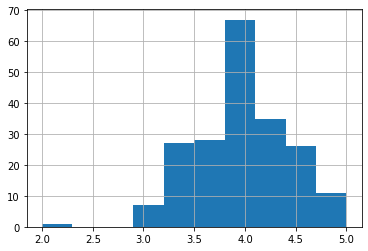

In [87]:
df.Rating.hist()

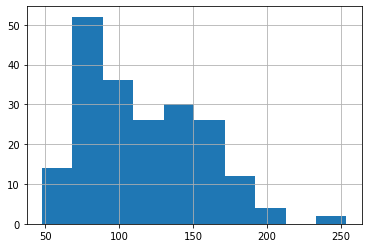

In [88]:
df['avg salary'].hist()

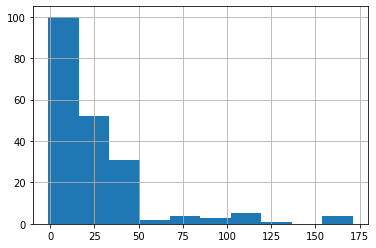

In [90]:
df.age.hist()

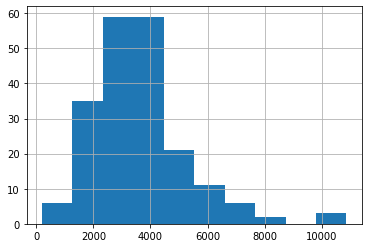

In [91]:
df['desc_len'].hist()

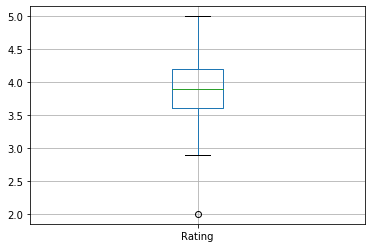

In [97]:
df.boxplot('Rating')

## Correlations

In [101]:
df[['age', 'avg salary', 'Rating', 'desc_len']].corr()

age  avg salary    Rating  desc_len
age         1.000000    0.013655 -0.114952  0.373551
avg salary  0.013655    1.000000  0.106791 -0.048699
Rating     -0.114952    0.106791  1.000000 -0.009350
desc_len    0.373551   -0.048699 -0.009350  1.000000

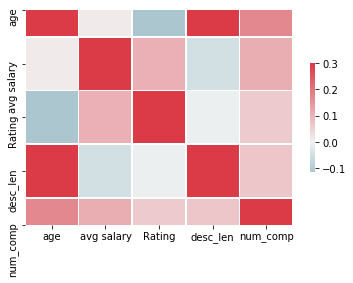

In [108]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['age', 'avg salary', 'Rating', 'desc_len', 'num_comp']].corr(), vmax=.3, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [106]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of nership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min salary', 'max salary',
       'avg salary', 'company name text', 'job city location', 'same_city',
       'age', 'python y/n', 'tableau y/n', 'excel y/n', 'aws y/n', 'spark y/n',
       'hadoop y/n', 'SQL y/n', 'BI y/n', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [114]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of nership', 'Industry', 'Sector', 'Revenue', 'company name text', 
    'job city location', 'same_city', 'python y/n', 'tableau y/n', 'excel y/n', 'aws y/n', 'spark y/n',
       'hadoop y/n', 'SQL y/n', 'BI y/n', 'job_simp', 'seniority']]

In [118]:
df_cat['Location'].value_counts()

San Francisco, CA          111
Santa Clara, CA             13
Palo Alto, CA               10
Sunnyvale, CA                8
San Jose, CA                 8
Redwood City, CA             7
Mountain View, CA            7
Menlo Park, CA               6
Oakland, CA                  5
South San Francisco, CA      4
San Mateo, CA                4
Sacramento, CA               4
Roseville, CA                3
San Ramon, CA                2
Emeryville, CA               2
Fremont, CA                  1
Cupertino, CA                1
Concord, CA                  1
Pleasanton, CA               1
Livermore, CA                1
Milpitas, CA                 1
Rocklin, CA                  1
Monterey, CA                 1
Name: Location, dtype: int64

Graph for Location: total = 7


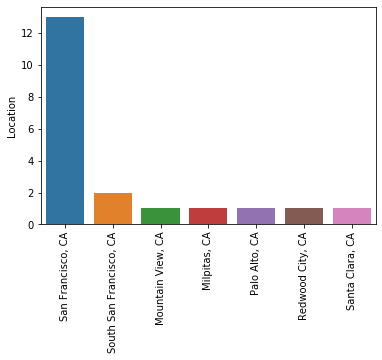

Graph for Headquarters: total = 10


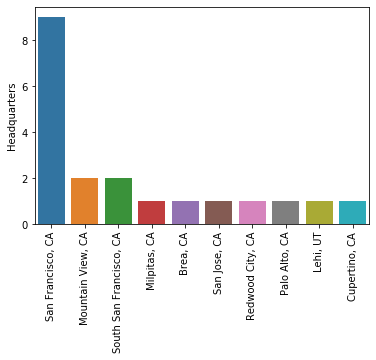

Graph for Size: total = 7


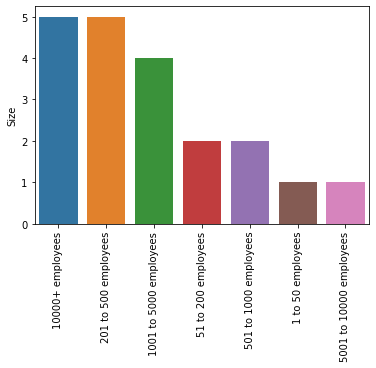

Graph for Type of nership: total = 3


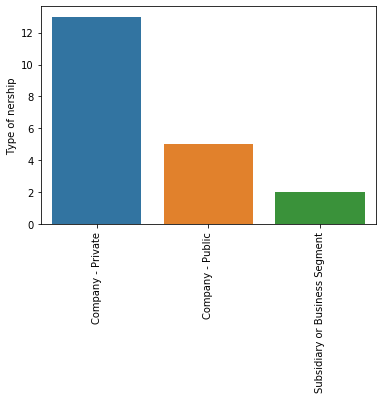

Graph for Industry: total = 11


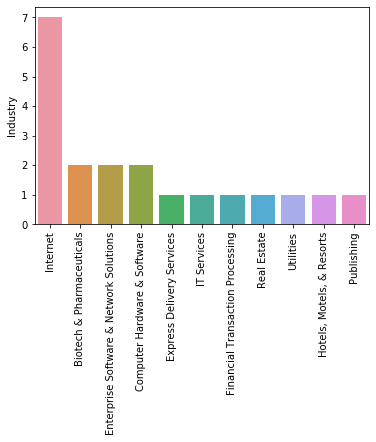

Graph for Sector: total = 8


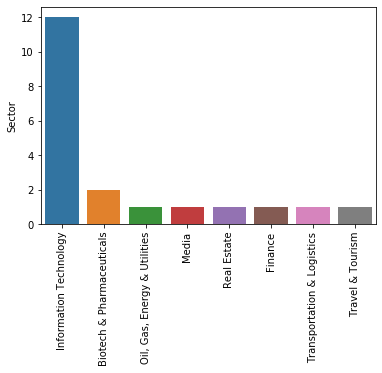

Graph for Revenue: total = 6


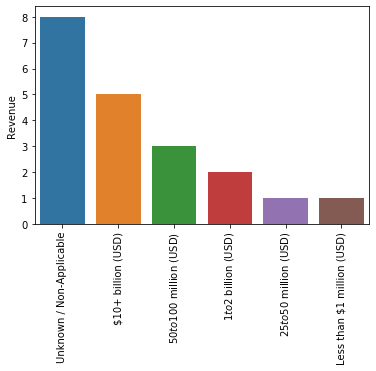

Graph for company name text: total = 19


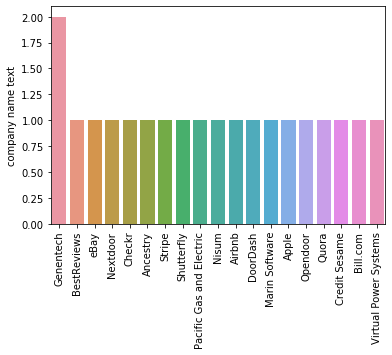

Graph for job city location: total = 7


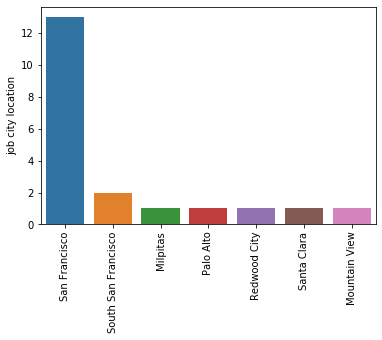

Graph for same_city: total = 2


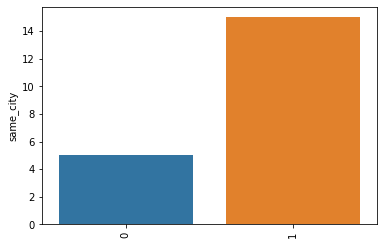

Graph for python y/n: total = 2


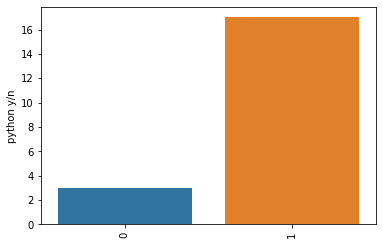

Graph for tableau y/n: total = 2


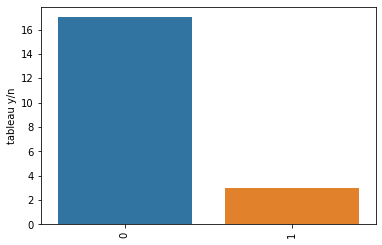

Graph for excel y/n: total = 2


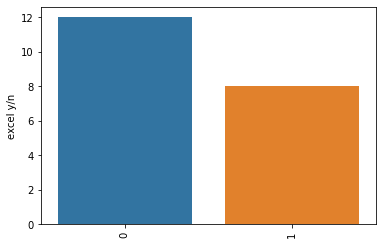

Graph for aws y/n: total = 2


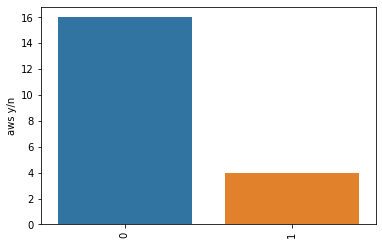

Graph for spark y/n: total = 2


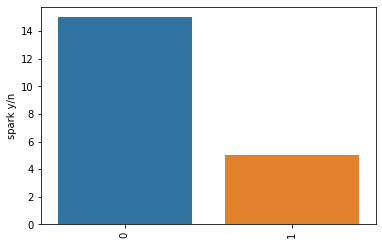

Graph for hadoop y/n: total = 2


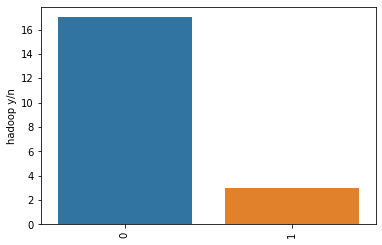

Graph for SQL y/n: total = 2


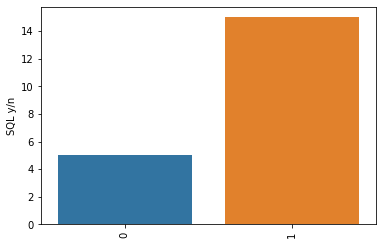

Graph for BI y/n: total = 2


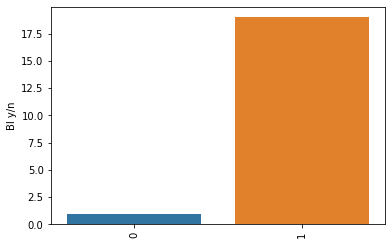

Graph for job_simp: total = 1


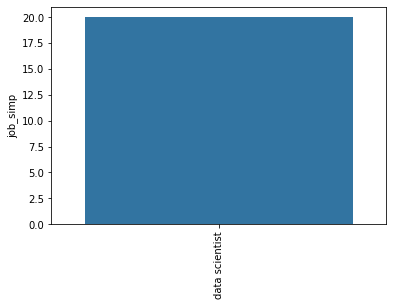

Graph for seniority: total = 2


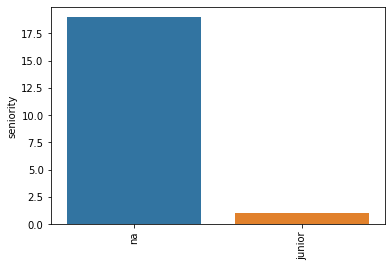

In [136]:
for i in df_cat:
    cat_num = df_cat[i][:20].value_counts()
    print('Graph for %s: total = %d'%( i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


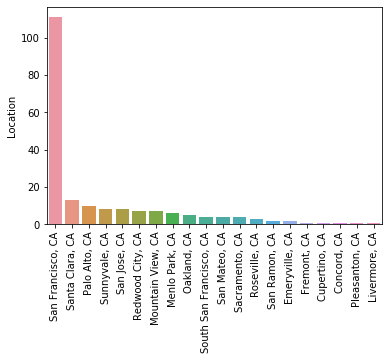

Graph for Headquarters: total = 20


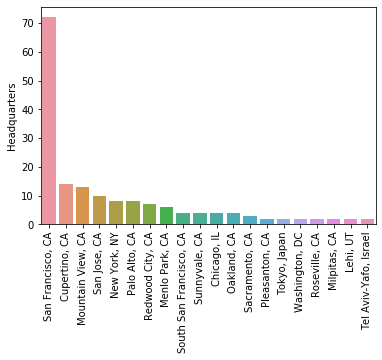

Graph for company name text: total = 20


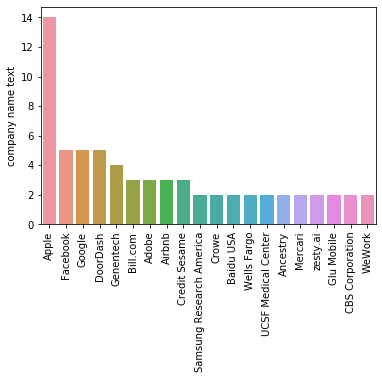

In [144]:
for i in df_cat[['Location', 'Headquarters', 'company name text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('Graph for %s: total = %d'%( i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Pivot tables

In [146]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of nership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min salary', 'max salary',
       'avg salary', 'company name text', 'job city location', 'same_city',
       'age', 'python y/n', 'tableau y/n', 'excel y/n', 'aws y/n', 'spark y/n',
       'hadoop y/n', 'SQL y/n', 'BI y/n', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

## Salary by Job role

In [148]:
pd.pivot_table(df, index = 'job_simp', values = 'avg salary')

avg salary
job_simp                  
analyst          88.170000
data engineer   150.151515
data scientist  149.402778
director        184.000000
manager         132.000000
mle             141.833333
na              135.340000

## Salary by role and seniority

In [149]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg salary')

avg salary
job_simp       seniority            
analyst        junior      67.500000
               na          83.433735
               senior     114.031250
data engineer  na         137.080000
               senior     191.000000
data scientist junior     119.500000
               na         147.140625
               senior     183.500000
director       na         184.000000
manager        na         132.000000
mle            na         134.600000
               senior     178.000000
na             na         137.083333
               senior      93.500000

## Number of roles available by location and position

In [159]:
pd.pivot_table(df, index = ['job city location','job_simp'], values = 'avg salary', aggfunc = 'count').sort_values('job city location',  ascending=False)

avg salary
job city location   job_simp                  
Sunnyvale           na                       4
                    director                 1
                    data scientist           1
                    data engineer            1
                    analyst                  1
South San Francisco data scientist           2
                    data engineer            1
                    analyst                  1
Santa Clara         analyst                  4
                    na                       5
                    data scientist           2
                    data engineer            2
San Ramon           analyst                  2
San Mateo           mle                      1
                    analyst                  3
San Jose            na                       2
                    data scientist           1
                    data engineer            1
                    analyst                  4
San Francisco       na                       4
                    mle                      4
                    manager                  1
                    data scientist          24
                    data engineer           22
                    analyst                 56
Sacramento          analyst                  4
Roseville           analyst                  3
Rocklin             analyst                  1
Redwood City        na                       1
                    data scientist           1
                    data engineer            1
                    analyst                  4
Pleasanton          analyst                  1
Palo Alto           na                       2
                    mle                      1
                    data scientist           2
                    analyst                  5
Oakland             analyst                  3
                    data engineer            2
Mountain View       data scientist           1
                    analyst                  3
                    na                       3
Monterey            analyst                  1
Milpitas            data scientist           1
Menlo Park          na                       2
                    data scientist           1
                    data engineer            2
                    analyst                  1
Livermore           na                       1
Fremont             analyst                  1
Emeryville          analyst                  1
                    data engineer            1
Cupertino           na                       1
Concord             analyst                  1

## Salary by location for data scientists

In [163]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job city location', values = 'avg salary').sort_values('avg salary', ascending = False)

avg salary
job city location              
San Jose             208.500000
South San Francisco  170.000000
Menlo Park           168.500000
Santa Clara          160.500000
Palo Alto            150.000000
San Francisco        147.604167
Sunnyvale            140.000000
Mountain View        133.500000
Redwood City         119.500000
Milpitas             105.000000

In [162]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of ownership

In [164]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of nership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer Provided Salary', 'min salary', 'max salary',
       'avg salary', 'company name text', 'job city location', 'same_city',
       'age', 'python y/n', 'tableau y/n', 'excel y/n', 'aws y/n', 'spark y/n',
       'hadoop y/n', 'SQL y/n', 'BI y/n', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [190]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue', 'desc_len', 'num_comp' ,'hourly', 'Employer Provided Salary', 'python y/n', 'tableau y/n', 'excel y/n', 'aws y/n', 'spark y/n',
       'hadoop y/n', 'SQL y/n', 'BI y/n', 'Type of nership','avg salary']]

In [191]:
df_pivots.columns

Index(['Rating', 'Industry', 'Sector', 'Revenue', 'desc_len', 'num_comp',
       'hourly', 'Employer Provided Salary', 'python y/n', 'tableau y/n',
       'excel y/n', 'aws y/n', 'spark y/n', 'hadoop y/n', 'SQL y/n', 'BI y/n',
       'Type of nership', 'avg salary'],
      dtype='object')

## Pivot tables for many categories

In [192]:
for i in df_pivots.columns:
    print ('\n' + i + ' \n---------------------------------------------\n')
    print(pd.pivot_table(df_pivots, index = i, values = 'avg salary').sort_values('avg salary', ascending=False)) 


Rating 
---------------------------------------------

        avg salary
Rating            
4.7     162.000000
4.1     134.633333
3.4     132.000000
3.3     128.222222
3.7     127.250000
5.0     126.083333
4.6     123.375000
2.9     121.500000
3.9     119.600000
4.9     119.333333
4.0     116.900000
4.5     115.416667
4.4     115.281250
3.8     114.568182
4.3     114.000000
4.2     110.750000
3.6     108.000000
3.2      90.300000
3.0      89.875000
3.5      86.812500
2.0      81.000000
3.1      71.000000

Industry 
---------------------------------------------

                                          avg salary
Industry                                            
Membership Organizations                  253.500000
Financial Analytics & Research            187.000000
Real Estate                               161.250000
Consulting                                157.500000
Insurance Agencies & Brokerages           155.000000
Research & Development                    150.000000
Video 

ValueError: Grouper for 'avg salary' not 1-dimensional

In [193]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python y/n', values = 'avg salary', aggfunc = 'count')

python y/n                           0     1
Revenue                                     
$1 to $2 billion (USD)             NaN   7.0
$1 to $5 million (USD)             2.0   NaN
$10 to $25 million (USD)           3.0   3.0
$10+ billion (USD)                11.0  26.0
$100 to $500 million (USD)         9.0   8.0
$2 to $5 billion (USD)             4.0   5.0
$25 to $50 million (USD)           3.0   5.0
$5 to $10 billion (USD)            4.0   8.0
$5 to $10 million (USD)            4.0   NaN
$50 to $100 million (USD)         11.0   7.0
$500 million to $1 billion (USD)   4.0   5.0
Less than $1 million (USD)         NaN   1.0
Unknown / Non-Applicable          29.0  43.0

## World Cloud

In [224]:
import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=stopwords.words("english") 

<function matplotlib.pyplot.show(*args, **kw)>

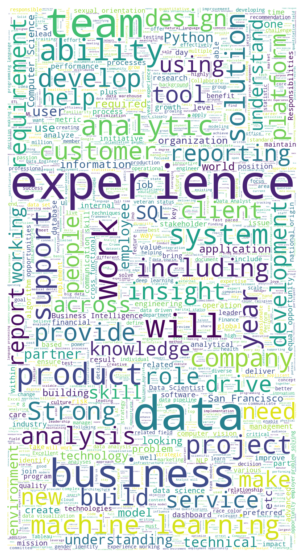

In [233]:
text = ''.join(df['Job Description'])

def punctuation_stop(text):
    "remove punctuation and stop words"
    filtered_sample=[]
    words=word_tokenize(text)
    for w in words:
        if w not in stop_words and w.isalpha():
            filtered_sample.append(w)
    
    return filtered_sample

filtered_words = punctuation_stop(text)

wordcloud = WordCloud(background_color="white", random_state = 1, max_words=2000, width = 800, height = 1500).generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show

'BestReviews.com is the ultimate product recommendation service for the modern shopping experience. We eliminate the need for consumers to spend hours determining the best product for their needs. We have partnerships that allow our content to be seen on top sites like those of the Chicago Tribune, New York Daily News and more.\nAs the only Data Scientist at BestReviews, you will lead our data infrastructure and projects. You will work alongside a multidisciplinary team, including product, content, creative, and engineering. Your work will have an immediate and direct impact on our site and our millions of users around the world. You will work directly with the Director of Product Management and founding team. You will be an integral part of identifying and implementing business growth efforts.\nWe want to better organize and get insights from our website and ecommerce data. With our recent growth, we are ready to invest in our data infrastructure, and we have a growing number of data 

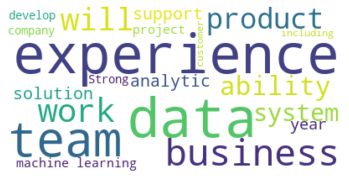

In [201]:
wc = WordCloud(background_color='white').generate(' '.join(brown.words()))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

LookupError: 
**********************************************************************
  Resource [93mbrown[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('brown')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/brown[0m

  Searched in:
    - '/Users/eduardocarrascosa/nltk_data'
    - '/Users/eduardocarrascosa/opt/anaconda3/nltk_data'
    - '/Users/eduardocarrascosa/opt/anaconda3/share/nltk_data'
    - '/Users/eduardocarrascosa/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
